In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\\Backup Data from Drive C\\Desktop\\Nhập môn KHDL\\Machine Learning\\city_day.csv')
df = df.dropna()
df.shape

(6236, 16)

## CORRELATION COEFFICIENT

In [14]:
def get_full_corr(dataset): # In ra ma trận hệ số corr với tất cả các hàng cột của data (>< 1m10s)
    # remove object type
    drop_col = []
    for i in dataset.columns:
        if dataset[i].dtypes == object:
            drop_col.append(i)
    dataset = dataset.drop(columns = drop_col)

    list_cov_x_y = []
    len_col = len(dataset.columns)
    len_row = len(dataset)
    labels = list(dataset.columns)
    print(labels)
    #COV(x, y)
    for i in range(0,len_col):
        cov_feat = []
        i_mean = dataset.iloc[:,i].mean()
        for k in range(0, len_col):
            cov_x_y = 0.0
            k_mean = dataset.iloc[:,k].mean()
            for j in range(0,len_row):
                cov_x_y += (dataset.iloc[j,i]-i_mean)*(dataset.iloc[j,k]-k_mean)
            cov_x_y /= len_row
            cov_feat.append(cov_x_y)
        list_cov_x_y.append(cov_feat)
    print(len(list_cov_x_y))
    #COV(x)
    list_cov_x = []
    for i in range(0,len_col):
        i_mean = dataset.iloc[:,i].mean()
        cov_x = 0.0
        for j in range(0,len_row):
            cov_x += (dataset.iloc[j,i]-i_mean)**2
        cov_x /= (len_row-1)
        list_cov_x.append(cov_x**0.5)
    #COV(y)
    list_cov_y = []
    for i in range(0,len_col):
        cov_y_feat = []
        for k in range(0, len_col):
            cov_y = 0.0
            k_mean = dataset.iloc[:,k].mean()
            for j in range(0,len_row):
                cov_y += (dataset.iloc[j,k]-k_mean)**2
            cov_y /= (len_row-1)
            cov_y_feat.append(cov_y**0.5)
        list_cov_y.append(cov_y_feat)
    #CORR(x,y)
    list_corr = []
    for i in range(0,len_col):
        tmp_list = []
        for j in range(0, len_col):
            tmp_list.append(list_cov_x_y[i][j]/(list_cov_x[i]*list_cov_y[i][j]))
        list_corr.append(tmp_list)
    #CREATE CORR DATAFRAME
    list_corr = pd.DataFrame(list_corr, columns=labels)
    labels = pd.Index(labels)
    list_corr = list_corr.set_index(labels)
    return list_corr

['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
13


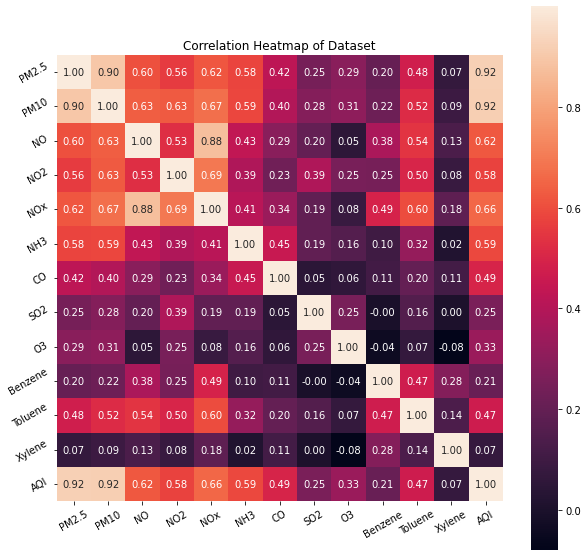

In [18]:
corr_matrix = get_full_corr(df)
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap of Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()  

In [15]:
def get_corr(df): # In ra ma trận hệ số corr với duy nhất cột nhãn của data (>< 6.6s)
    # remove object type
    drop_col = []
    for i in df.columns:
        if df[i].dtypes == object:
            drop_col.append(i)
    df = df.drop(columns = drop_col)

    list_cov_x_y = []
    len_col = len(df.columns)
    len_row = len(df)
    labels = list(df.columns)
    print(labels)
    #COV(x, y)
    list_cov_x_y = []
    len_col = len(df.columns)
    len_row = len(df)
    print(len_col, len_row)
    y_mean = df.iloc[:,len_col-1].mean()
    for i in range(0,len_col):
        cov_x_y = 0.0
        x_mean = df.iloc[:,i].mean()
        for j in range(0,len_row):
            cov_x_y += (df.iloc[j,i]-x_mean)*(df.iloc[j,len_col-1]-y_mean)
        cov_x_y /= len_row
        list_cov_x_y.append(cov_x_y)
    #COV(x)
    list_cov_x = []
    for i in range(0,len_col):
        cov_x = 0.0
        x_mean = df.iloc[:,i].mean()
        for j in range(0,len_row):
            cov_x += (df.iloc[j,i]-x_mean)**2
        cov_x /= (len_row-1)
        list_cov_x.append(cov_x**0.5)
    #COV(y)
    list_cov_y = []
    y_mean = df.iloc[:,len_col-1].mean()
    for i in range(0,len_col):
        cov_y = 0.0
        for j in range(0,len_row):
            cov_y += (df.iloc[j,len_col-1]-y_mean)**2
        cov_y /= (len_row-1)
        list_cov_y.append(cov_y**0.5)
    #CORR(x,y)
    list_corr = []
    for i in range(0,len_col):
        list_corr.append(list_cov_x_y[i]/(list_cov_x[i]*list_cov_y[i]))
    #CREATE CORR DATAFRAME
    list_corr = pd.DataFrame(list_corr, columns=['Y'])
    labels = pd.Index(labels)
    list_corr = list_corr.set_index(labels)
    return list_corr

['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
13 6236


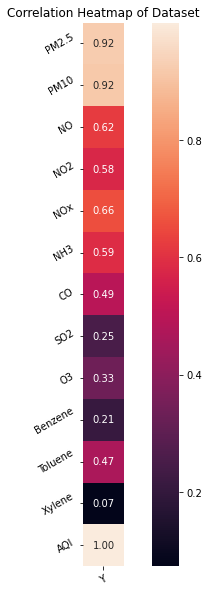

In [19]:
corr_matrix = get_corr(df)
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap of Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()  

## TRAIN TEST SPLIT

In [9]:
def train_test_split(features, label_name, test_size, random_state):
    shuffle_feature_df = features.sample(frac = 1,random_state=random_state)
    test_size = int(test_size*len(features))
    X_train = shuffle_feature_df[test_size:]
    X_test = shuffle_feature_df[:test_size]
    y_train = X_train[label_name]
    y_test = X_test[label_name]
    X_train = X_train.drop(columns=[label_name])
    X_test = X_test.drop(columns=[label_name])
    return X_train, X_test, y_train, y_test

In [10]:
X = df.drop(columns=['City','Date','AQI_Bucket'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,'AQI',test_size=0.95,random_state=1)

In [12]:
print(X_train.shape,' ',X_test.shape,' ',df.shape)

(312, 12)   (5924, 12)   (6236, 16)


In [13]:
X_train.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
3062,12.74,30.83,1.66,10.27,6.81,9.45,0.59,13.28,34.95,0.13,0.77,0.15
2738,6.85,13.30,1.61,1.52,1.86,2.44,0.46,13.29,18.07,0.04,0.26,0.10
19755,42.51,62.04,5.02,11.91,16.97,17.94,0.56,7.73,59.02,2.23,5.97,0.43
11451,111.95,302.10,42.33,54.75,76.02,45.99,2.20,16.31,57.48,3.61,5.38,0.00
16539,24.12,56.89,6.46,23.33,16.59,10.57,0.34,5.38,27.84,1.34,9.90,0.82
